In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# placeholders (to inject data into the model)
data = tf.placeholder(tf.float32, [None, 784])
labels = tf.placeholder(tf.float32, [None, 10])

hidden_size = 50
output_size = 10

with tf.variable_scope('hidden_layer') as scope:
    weights = tf.get_variable('hidden_w',[784, hidden_size], 
                                     initializer = tf.truncated_normal_initializer(stddev=0.01))
    biases = tf.Variable(tf.ones([hidden_size]))
    hidden = tf.nn.relu(tf.matmul(data, weights)+biases) 
    
with tf.variable_scope('out') as scope:
    weights = tf.get_variable('out_w',[hidden_size,output_size], 
                                     initializer = tf.truncated_normal_initializer(stddev=0.01))
    biases = tf.Variable(tf.ones([output_size]))
    logits = tf.matmul(hidden, weights)+ biases


cross_entropy = tf.losses.softmax_cross_entropy(onehot_labels=labels,logits = logits)
    

# define evaluation metrics
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [4]:
def train():
    # define training-operation
    import sys
    learning_rate = 0.5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    #optimizer = tf.train.AdamOptimizer(learning_rate)
    train_op = optimizer.minimize(cross_entropy)
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()

    # define log variables
    cross_entropy_train, cross_entropy_test = [], []
    accuracy_train, accuracy_test = [], []
    iteration = []

    for _ in range(4000):
        if _ % 100 == 0:
        #calculate metrics
            cross_entropy_train_ = sess.run(cross_entropy, 
                                       feed_dict={data:mnist.train.images, 
                                                  labels:mnist.train.labels})
            cross_entropy_test_ = sess.run(cross_entropy, 
                               feed_dict={data:mnist.test.images, 
                                          labels:mnist.test.labels})
            accuracy_train_ = sess.run(accuracy, 
                 feed_dict={data: mnist.train.images, 
                            labels: mnist.train.labels})
            accuracy_test_ = sess.run(accuracy, 
                                 feed_dict={data: mnist.test.images, 
                                            labels: mnist.test.labels})
        # log metrics
            cross_entropy_train.append(cross_entropy_train_)
            cross_entropy_test.append(cross_entropy_test_)
            accuracy_train.append(accuracy_train_)
            accuracy_test.append(accuracy_test_)
            iteration.append(_)
            
        # show something
            if _ % 100 == 0:
                sys.stdout.write('\r for iteration {} accuracy_test is {}'.format(_,accuracy_test[-1]))
            
    # train the model
        batch_xs, batch_ys = mnist.train.next_batch(64)
        sess.run(train_op, feed_dict={data: batch_xs, labels: batch_ys})
        
    import matplotlib.pyplot as plt
    plt.title('learning curve (accuracy)')
    plt.plot(iteration, accuracy_train)
    plt.plot(iteration, accuracy_test)
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.show()
    
    plt.title('learning curve (cross_entropy)')
    plt.plot(iteration, cross_entropy_train)
    plt.plot(iteration, cross_entropy_test)
    plt.xlabel('iteration')
    plt.ylabel('loss/cost')
    plt.show()
    sess.close()


 for iteration 3900 accuracy_test is 0.9718000292778015

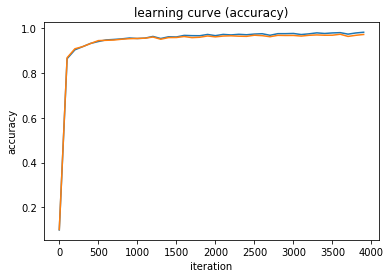

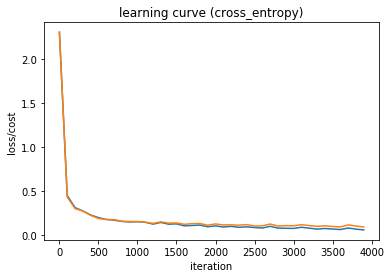

CPU times: user 1min 27s, sys: 22.6 s, total: 1min 49s
Wall time: 47.5 s


In [5]:
%%time
train()